# Mastermind

Mastermind is a two-player game, where one player represents an encoder, the second player the decoder.
The encoder chooses a secret code by choosing a pattern of four differently colored pegs out of six total pegs of different color.
The decoder tries to guess the code by himself placing guesses on a decoding board, for which he receives feedback, which gives him information to consider in subsequent turns.


In [95]:
from functools import lru_cache
from itertools import combinations, permutations
from random import choice
import matplotlib.pyplot as plt

In [96]:
""" A game of mastermind. Rules: not duplicates, blanks allowed -> atleast for now """
Pattern = str # e.g. "RRRR" for four reds
Feedback = str
Hit, Present, Miss = 'HP.'

## Encoding feedback and giving information

In [97]:
@lru_cache(None)
def give_feedback(guess: Pattern, target: Pattern) -> Feedback:
    """ returns a four letter string representing Hits, Misses and Presents """
    feedback = [Hit if guess[i] == target[i] else Miss for i in range(4)] # deal with present later
    for i in len(feedback):
        if feedback[i] == Miss:
            if target.contains(feedback[i]):
                feedback[i] = P
    return "".join(feedback)

## Playing the game EP1 - the naive approach
The naive approach would be to brute force the solution, which we can easily do since there are only $6^4$ possible patterns.

In [98]:
universe = ["1","2","3","4","5","6"]
patterns = ["".join(perm) for perm in list(permutations(universe, 4))]
print(len(patterns))
N = len(patterns) # the number of permutations without blanks and duplicates
def play(target: Pattern, wordlist, turns=N):
    """ returns the number of turns until a word is guessed """
    lst = wordlist.copy()
    for turn in range(0, N-1):
        pick = choice(lst)
        lst.remove(pick)
        pick = str(pick)
        if pick == target:
            return turn+1

play(patterns[0], patterns)
#print(patterns[:20])

360


177

Text(0.5, 0, 'number of turns')

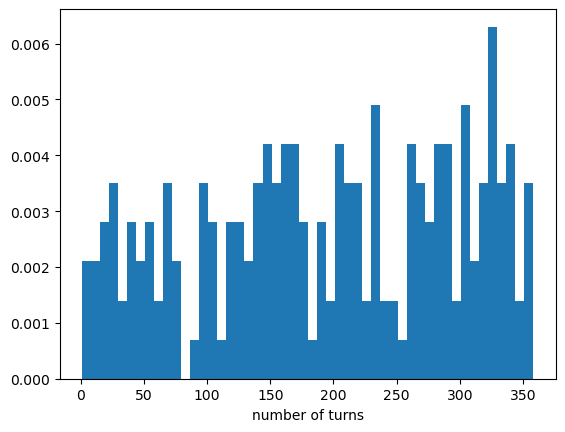

In [111]:
# list is empty, because it is passed by reference ad play removes from it
def simulate(N: int):
    turns = []
    for i in range (0,N):
        target = choice(patterns)
        turns.append(play(target, patterns))
    return turns

# Let's play the game 200 times...
sample = simulate(200)
#print(sample)

# Plot the result
plt.hist(sample, density=True, bins=50)
plt.xlabel("number of turns")